Try:
-  `.info()` 
-  `.describe()` 
-  `pd.plotting.scatter_matrix()` 


# Clean data

## Upload data

In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [447]:
data = pd.read_csv('kc_house_data.csv')

In [448]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [449]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Merge population dataframe with main dataframe

In [450]:
pop_data = pd.read_csv('kc_housing_zip_data.csv')

In [451]:
pop_data.head(2)

,Unnamed: 0,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,0,98178,25363,262,10.3
1,262,98125,39254,409,10.4


In [452]:
pop_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [453]:
pop_data.head(2)

,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,98178,25363,262,10.3
1,98125,39254,409,10.4


In [454]:
# data2 = pd.merge(data, pop, left_on='zipcode', right_on='zip_code')
data = pd.merge(data, pop_data, left_on='zipcode', right_on='zipcode')

In [455]:
data.sort_values(by=['price']).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_pop,listings_in_zip,hot_market_score
17189,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,1942,NaN,98168,47.4739,-122.280,1700,10387,32569,269,8.3
21156,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,1912,0.0,98014,47.6499,-121.909,1200,7500,6973,124,17.8
17200,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,1943,0.0,98168,47.4808,-122.315,860,9000,32569,269,8.3
2722,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,1954,0.0,98146,47.4987,-122.341,1140,11250,26730,288,10.8
17018,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,1951,0.0,98168,47.4799,-122.296,1572,10570,32569,269,8.3


In [456]:
data.shape

(21597, 24)

## Drop columns

**Columns to drop:**  
 - date - don't care when house was sold. All in the same 9 months  
 - id - house id not important  
 - view - My goal is to look into qualities of the houses, not the sales process  
 - condition - concept overlaps with 'grade'. Don't want to use both.  
 - lat - I'll use zip codes, but not looking into that specific geography 
 - long - same as above  
 
 I'll probably also drop some square footage stuff after I look into it some based on collinearity  

In [457]:
to_drop = ['id', 'date', 'view', 'condition', 'lat', 'long']

In [458]:
data.drop(to_drop, axis=1, inplace=True)

In [459]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,zipcode_pop,listings_in_zip,hot_market_score
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,1180,0.0,1955,0.0,98178,1340,5650,25363,262,10.3


## Check for collinearity of area-based columns

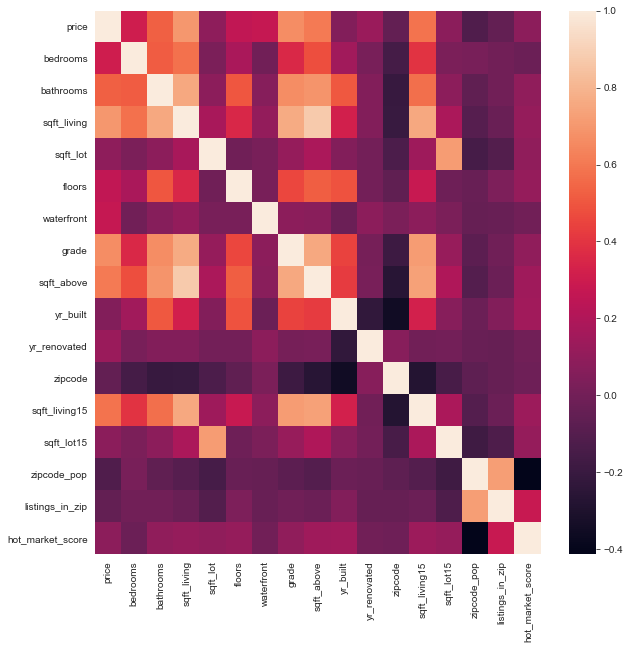

In [460]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

In [461]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_above            int64
sqft_basement        object
yr_built              int64
yr_renovated        float64
zipcode               int64
sqft_living15         int64
sqft_lot15            int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

In [462]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

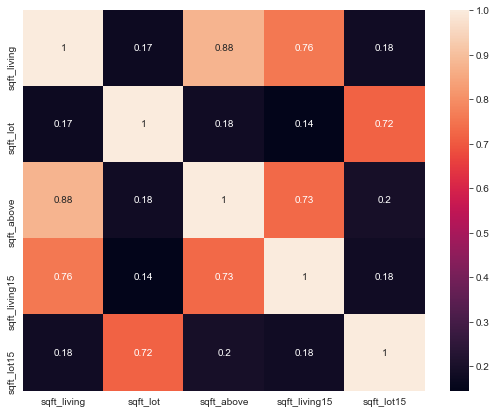

In [463]:
plt.figure(figsize=(9,7))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_living/sqft_above  
- sqft_living/sqft_living15  

I'll take those out of the heatmap and recheck:

In [464]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15']

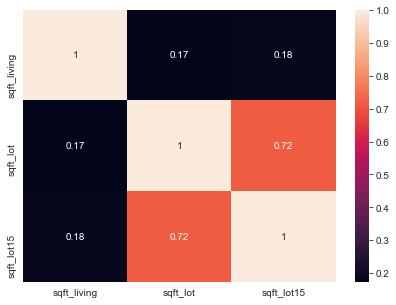

In [465]:
plt.figure(figsize=(7,5))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_lot/sqft_lot15  

So I'll remove from the dataframe:
- sqft_above  
- sqft_living15  
- sqft_lot15  

## Drop collinear columns

In [466]:
to_drop = ['sqft_above', 'sqft_living15', 'sqft_lot15']
data.drop(to_drop, axis=1, inplace=True)

In [467]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,0.0,1955,0.0,98178,25363,262,10.3


## Convert datatypes and deal with NaN's

In [468]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement        object
yr_built              int64
yr_renovated        float64
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

In [469]:
data.sqft_basement

0          0.0
1          0.0
2        480.0
3          0.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596    500.0
Name: sqft_basement, Length: 21597, dtype: object

`data.sqft_basement = data.sqft_basement.astype(float)` doesn't work. Must be some weird characters in it.

In [470]:
data.sqft_basement.tolist()[0:20]

['0.0',
 '0.0',
 '480.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '140.0',
 '0.0',
 '970.0',
 '0.0',
 '920.0',
 '0.0',
 '670.0']

I see there are a lot of '?' in it.

In [471]:
data.sqft_basement.tolist().count('?')

454

In [472]:
data.sqft_basement.tolist().count('?')/len(data)

0.021021438162707785

Just about 2% are question marks. I'll just assume these homes have no basement.

In [473]:
data.sqft_basement = data.sqft_basement.replace(to_replace='?', value='0.0')

Now, I'll convert them to floats

In [474]:
data.sqft_basement = data.sqft_basement.astype(float)

Converting bathroom to integer...

I was going to do: `data.bathrooms = data.bathrooms.astype(int)` but I see that there are half bathrooms, etc. so I'll leave that alone.

In [475]:
data.bathrooms.tolist()[0:10]

[1.0, 1.0, 2.25, 1.0, 1.0, 1.75, 1.0, 1.0, 1.5, 2.0]

Converting yr_renovated to integer

`data.yr_renovated = data.yr_renovated.astype(int)` gives me an error. Might be some weird data in there.

In [476]:
data.yr_renovated.tolist()[0:10]

[0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 1983.0]

I see there are some `nan`. Will change to 0.

In [477]:
data.yr_renovated.isna().sum()/len(data)

0.17789507802009538

18% has no data as to whether was renovated. I'm going to convert those to 0, in particular because I plan to only look at "recently renovated" later on, and if something was recently renovated, it should be have a date. 

In [478]:
data.yr_renovated = data.yr_renovated.fillna(0)

In [479]:
data.yr_renovated = data.yr_renovated.astype(int)

In [480]:
data.yr_renovated

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21597, dtype: int32

Check out waterfront

In [481]:
data.waterfront.isna().sum()/len(data)

0.11001527989998611

11% of waterfront is nan. But I'll convert that to 0, because if something had a waterfront, it would likely be known.

In [482]:
data.waterfront = data.waterfront.fillna(0)

Any more Nan's? Nope...

In [483]:
data.isnull().any()

price               False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
floors              False
waterfront          False
grade               False
sqft_basement       False
yr_built            False
yr_renovated        False
zipcode             False
zipcode_pop         False
listings_in_zip     False
hot_market_score    False
dtype: bool

## Check for outliers

One of the bedrooms is off

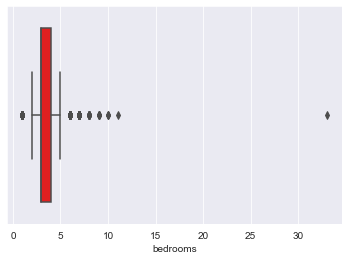

In [484]:
sns.boxplot(x=data['bedrooms'], color='r')

In [485]:
data[data.bedrooms > 20]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
5423,640000.0,33,1.75,1620,6000,1.0,0.0,7,580.0,1947,0,98103,48600,602,12.4


I'll remove this one.

In [486]:
data.drop([5423], inplace=True)

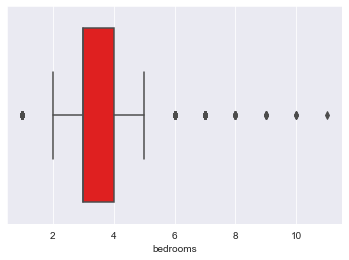

In [487]:
sns.boxplot(x=data['bedrooms'], color='r')

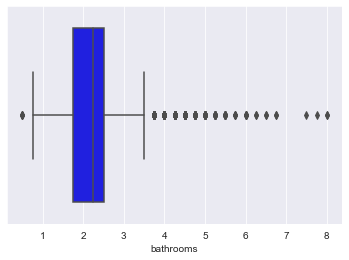

In [488]:
sns.boxplot(x=data['bathrooms'], color='b')

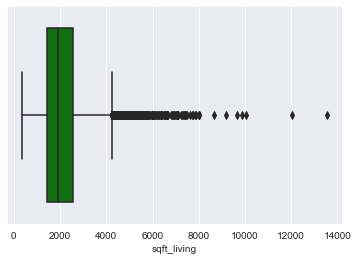

In [489]:
sns.boxplot(x=data['sqft_living'], color='g')

In [490]:
data[data.sqft_living > 11000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
1897,2280000.0,7,8.0,13540,307752,3.0,0.0,12,4130.0,1999,0,98053,21185,403,19.0
16536,7700000.0,6,8.0,12050,27600,2.5,0.0,13,3480.0,1910,1987,98102,23655,104,4.4


I'll drop those two mansions.

In [491]:
data.drop(data[data.sqft_living > 11000].index, inplace = True) 

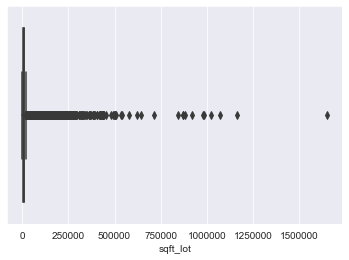

In [492]:
sns.boxplot(x=data['sqft_lot'], color='y')

In [493]:
data[data.sqft_lot > 1250000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
18767,700000.0,4,1.0,1300,1651359,1.0,0.0,6,0.0,1920,0,98022,21567,233,10.8


I'll get rid of this outlier

In [494]:
data.drop(data[data.sqft_lot > 1250000].index, inplace = True) 

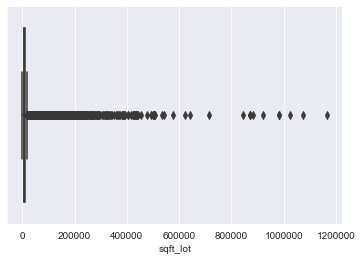

In [495]:
sns.boxplot(x=data['sqft_lot'], color='y')

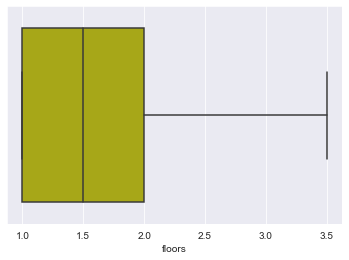

In [496]:
sns.boxplot(x=data['floors'], color='y')

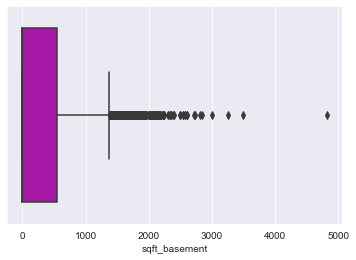

In [497]:
sns.boxplot(x=data['sqft_basement'], color='m')

That's a weird house with a HUGE basement. I'll drop it.

In [498]:
data.drop(data[data.sqft_basement > 4000].index, inplace = True) 

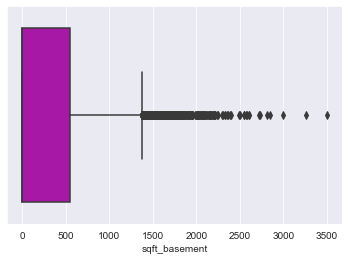

In [499]:
sns.boxplot(x=data['sqft_basement'], color='m')

In [500]:
data[data.bedrooms > 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
20527,520000.0,11,3.0,3000,4960,2.0,0.0,7,600.0,1918,1999,98106,24603,335,13.6


In [501]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int32
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

All the other ones look good

Check for correlation again.

In [502]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
price,1.000000,0.315598,0.522522,0.699231,0.091866,0.258280,0.262205,0.670170,0.312823,0.056155,0.111895,-0.053989,-0.118603,-0.049503,0.090009
bedrooms,0.315598,1.000000,0.527208,0.593848,0.032226,0.183219,-0.003049,0.365273,0.301926,0.160997,0.017547,-0.158580,0.017224,-0.002788,-0.022919
bathrooms,0.522522,0.527208,1.000000,0.753824,0.092252,0.503084,0.060723,0.664949,0.272381,0.509269,0.044089,-0.205395,-0.059339,-0.000713,0.099432
sqft_living,0.699231,0.593848,0.753824,1.000000,0.178959,0.354631,0.101247,0.763837,0.421667,0.321026,0.046909,-0.201130,-0.092942,-0.028965,0.113511
sqft_lot,0.091866,0.032226,0.092252,0.178959,1.000000,-0.004253,0.022597,0.120772,0.013887,0.058052,0.005540,-0.132571,-0.153443,-0.106603,0.102045
floors,0.258280,0.183219,0.503084,0.354631,-0.004253,1.000000,0.021401,0.458678,-0.244604,0.489417,0.003579,-0.059596,-0.034650,0.037207,0.111827
waterfront,0.262205,-0.003049,0.060723,0.101247,0.022597,0.021401,1.000000,0.081136,0.078017,-0.024820,0.071301,0.029421,-0.035499,-0.035102,-0.003166
grade,0.670170,0.365273,0.664949,0.763837,0.120772,0.458678,0.081136,1.000000,0.162099,0.448553,0.013647,-0.185947,-0.070072,-0.008479,0.099802
sqft_basement,0.312823,0.301926,0.272381,0.421667,0.013887,-0.244604,0.078017,0.162099,1.000000,-0.130739,0.061182,0.074011,-0.001502,-0.019013,-0.046106
yr_built,0.056155,0.160997,0.509269,0.321026,0.058052,0.489417,-0.024820,0.448553,-0.130739,1.000000,-0.202469,-0.347290,-0.024699,0.054172,0.153171


In [503]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Only things like sqft_living, grade, and bathrooms. But I don't want to delete those.

# Categorical Data

## Find which columns are categorical

In [504]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int32
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

In [565]:
categorical = ['bedrooms', 'floors', 'waterfront', 'grade', 'bathrooms']
zip = None

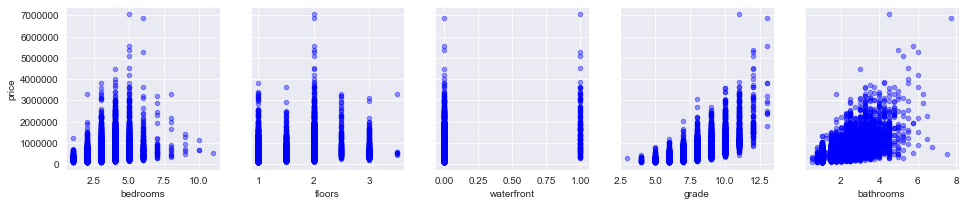

In [564]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(categorical, axes):
    data.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')

Actually, I won't consider bathrooms to be categorical

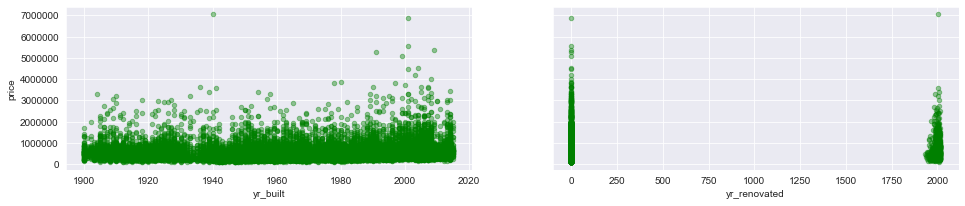

In [507]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'yr_renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='g')

yr_renovated looks weird. Will make it bigger.

In [508]:
new_renov = data[data.yr_renovated > 0] 

In [509]:
new_renov.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
9,290900.0,2,2.0,1610,17600,2.0,0.0,6,0.0,1930,1983,98178,25363,262,10.3


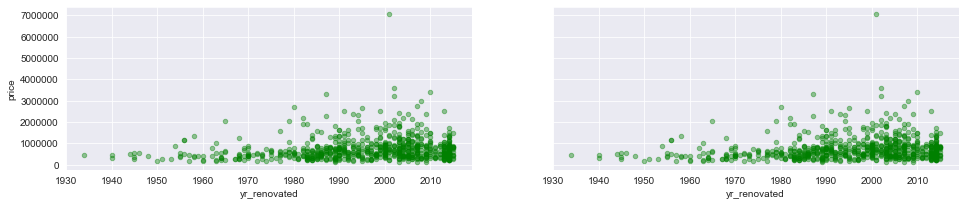

In [510]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'yr_renovated'], axes):
    new_renov.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='g')

I'm going to create a new column 'recent_renov' and set 1990 as a cut off year. 25 years ago.

In [511]:
data['recent_renov'] = [1 if x >= 1990 else 0 for x in data['yr_renovated']]

In [512]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,0.0,1955,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0.0,6,0.0,1945,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0.0,8,480.0,1967,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0.0,7,0.0,1961,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0.0,6,0.0,1931,0,98178,25363,262,10.3,0


## Most expensive houses

Curious, what sort of houses are the most expensive?

In [513]:
data.sort_values(by=['price'], ascending=False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
13576,7060000.0,5,4.50,10040,37325,2.0,1.0,11,2360.0,1940,2001,98004,32587,317,9.7,1
21560,6890000.0,6,7.75,9890,31374,2.0,0.0,13,1030.0,2001,0,98039,3120,50,16.0,0
21552,5570000.0,5,5.75,9200,35069,2.0,0.0,13,3000.0,2001,0,98039,3120,50,16.0,0
13533,5350000.0,5,5.00,8000,23985,2.0,0.0,12,1280.0,2009,0,98004,32587,317,9.7,0
6345,5300000.0,6,6.00,7390,24829,2.0,1.0,12,2390.0,1991,0,98040,24120,282,11.7,0


In the Belleview or Medina areas, which I guess are wealthy suburbs

## One-hot encode categorical

In [441]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int32
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
recent_renov          int64
dtype: object

I've already done:
- "recent_renov"  

I'll do:  
- "waterfront" 

Maybe: 
- "grade"  

Should I do:
- bedrooms?  
- floors?  
- yr_built?   

### Waterfront

It actually seems waterfront is already in 1's and 0's. I'll just convert them to an integer.

In [514]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,0.0,1955,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0.0,6,0.0,1945,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0.0,8,480.0,1967,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0.0,7,0.0,1961,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0.0,6,0.0,1931,0,98178,25363,262,10.3,0


In [515]:
data.waterfront.nunique()

2

In [516]:
data.waterfront = data.waterfront.astype(int)

In [517]:
data.waterfront.nunique()

2

In [518]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='waterf', drop_first=True)

In [520]:
waterfront_dummies.sort_values(by=['waterf_1'])

,waterf_1
0,0
14397,0
14396,0
14395,0
14394,0
...,...
2580,1
202,1
12334,1
2499,1


In [521]:
# I was going to do the following, but I don't need to. It's already binary. You only need to do this (I think) if 
        # there are more than one variable. 
    
    
# data = data.drop(['waterfront'], axis=1)
# data = pd.concat([data, waterfront_dummies], axis=1)

### Grade

First, check a histogram

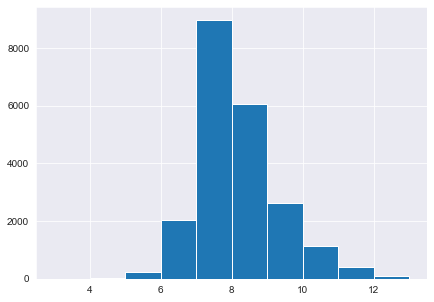

In [527]:
data['grade'].hist(figsize=[7,5])

It seems fairly normally distributed. I won't change it for now.

### Other categories (bedroom, floors)

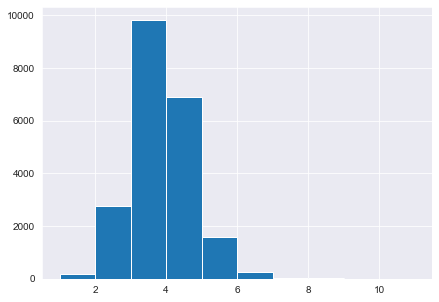

In [529]:
data['bedrooms'].hist(figsize=[7,5])

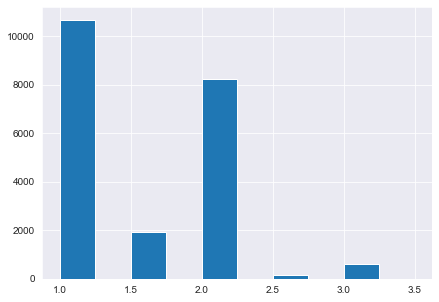

In [530]:
data['floors'].hist(figsize=[7,5])

In [531]:
data.floors.nunique()

6

In [535]:
floors = data.floors.tolist()

In [537]:
np.unique(floors)

array([1. , 1.5, 2. , 2.5, 3. , 3.5])

It might be worth setting these to a categorical variables. But first let me check the correlation between floors and price. I don't seeing it matter that much, as opposed to something like square feet.

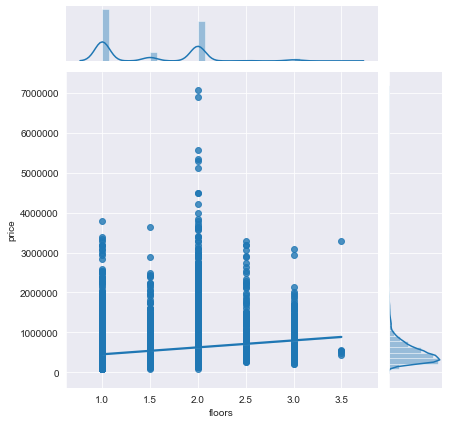

In [543]:
sns.jointplot(x = data.floors,y=data.price, kind='reg')

It's almost flat, and only seems to matter in houses below $1 mil. If I were limiting my data to these houses, I might convert them, but it doesn't seem to matter right now.

In [556]:

under_mil = data[data.price < 1000000]
under_mil.shape


(20105, 16)

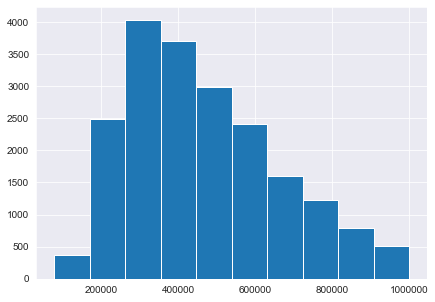

In [557]:
# data['floors'].hist(figsize=[7,5])
under_mil.price.hist(figsize=[7,5])

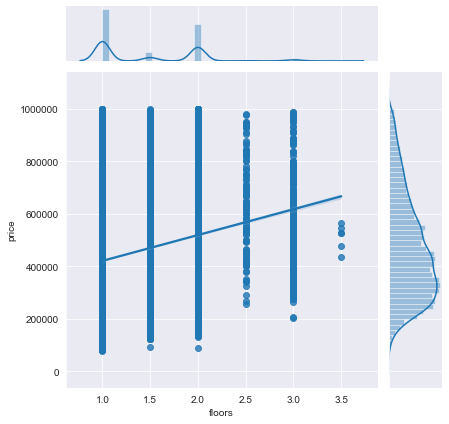

In [558]:
sns.jointplot(x = under_mil.floors, y = under_mil.price, kind='reg')

Just wanted to check the under $1 mil houses. The correlation does seem stronger in this group.

## Check for collinearity again

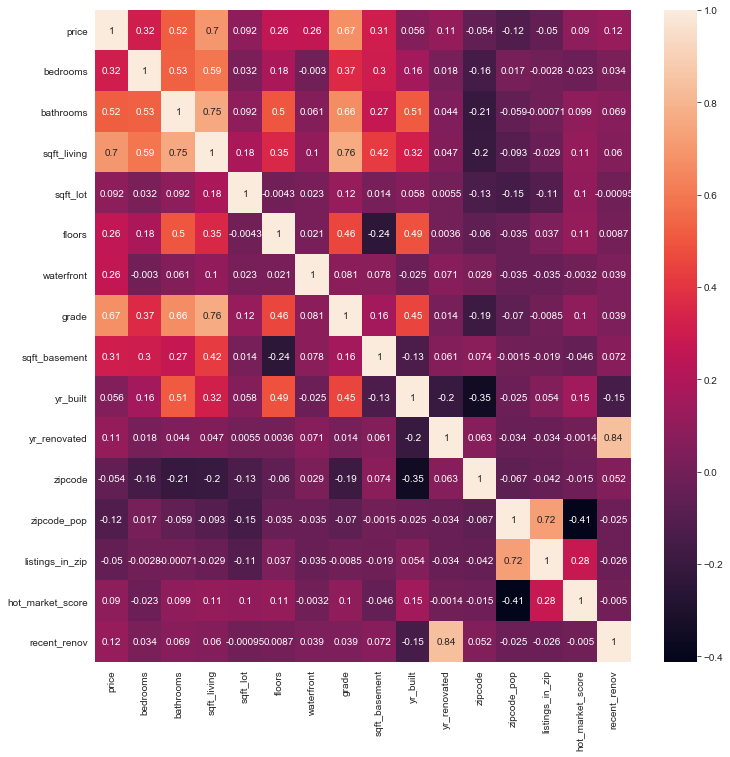

In [560]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True);

There does seem to be a strong collinearity between `listings_in_zip` and `zipcode_pop`, but that's to be expected.

# Export data

Now that I've finished with the cleaning and EDA, I'll export it so I can start over in new notebook.

In [561]:
# check it one more time
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,98178,25363,262,10.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2720000.0,4,3.25,3990,18115,2.0,0,11,0.0,1989,0,98039,3120,50,16.0,0
21593,1950000.0,4,3.50,4065,18713,2.0,0,10,0.0,1987,0,98039,3120,50,16.0,0
21594,2250000.0,5,5.25,3410,8118,2.0,0,11,0.0,2006,0,98039,3120,50,16.0,0
21595,2900000.0,5,4.00,5190,14600,2.0,0,11,0.0,2013,0,98039,3120,50,16.0,0


In [562]:
data.to_csv('kc_house_data_cleaned.csv')